In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Simulating free fall

The state vector has the position and velocity vectors
$$
\mathbf{x}= \begin{bmatrix}
 \mathbf{p}
\\ 
\mathbf{\dot p}
\end{bmatrix}.
$$

The dynamics is described by the differential equation
$$
\mathbf{\dot x} = \begin{bmatrix}
\mathbf{\dot p}\\
-mg\mathbf{e}_3
\end{bmatrix},
$$
where $\mathbf{e}_3= [0,0,1]^\top$.

### Euler integration

In [2]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Simulation parameters

In [3]:
# mass and gravity
m, g = 1, 9.8
# z unit vector
e3 = np.array([0,0,1])

tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

# Simulation 

In [4]:
# Initial conditions
x = array([0,0,10, 0., 0., 0.])
dx = np.zeros(6)

x_log = [copy(x)]

for t in time[1:]:
    
    # Total force 
    f_T = -m*g*e3
    
    # Dynamics
    dx[:3] = x[3:]
    dx[3:] = f_T / m
    
    x = simulate(Δt, x, dx)
    x_log.append(copy(x))
    
x_log = array(x_log)

### Plot: time Vs z-coordinate

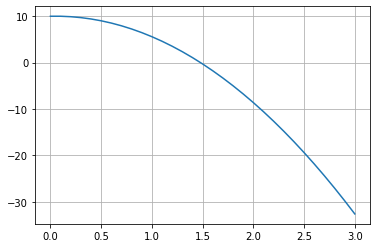

In [5]:
grid()
plot(time, x_log[:,2])

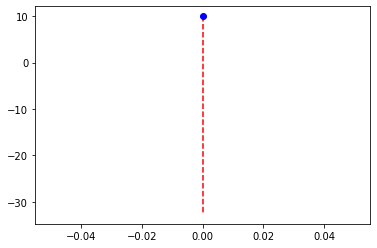

In [16]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()


def animate(t):
    ax.clear()
    
    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--')
    
    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')
        

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
HTML(anim.to_jshtml())



# Simulating the floor (like dropping an egg)
The velocity and acceleration of the particle stops when the z-coordinate reaches zero.

Note that the low time step makes the robot pass the zero. A small time step will reduce that error.

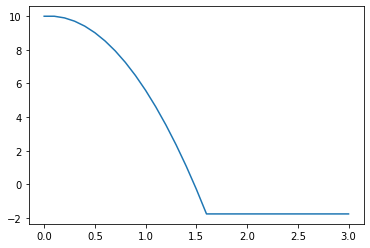

In [7]:
# Initial conditions
x = array([0,0,10, 0., 0., 0.])
dx = np.zeros(6)

x_log = [copy(x)]

# Run
for t in time[1:]:
    
    # Total force 
    f_T = -m*g*e3
    # Dynamics
    dx[:3] = x[3:]
        
    if x[2] > 0:  
        dx[:3] = x[3:]
        dx[3:] = f_T / m
    else:        
        dx[3:] = np.zeros(3)
        x[3:] = np.zeros(3)
    
    x = simulate(Δt, x, dx)
    x_log.append(copy(x))
    
x_log = array(x_log)

plot(time, x_log[:,2])

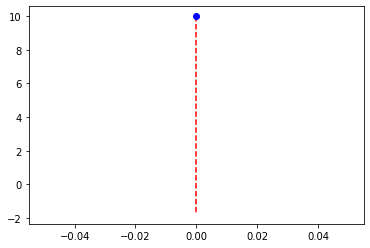

In [8]:
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
HTML(anim.to_jshtml())

# Simulating a flat ramp
The ramp has the form $z(x)=-2x+3$ and the point starts at $(x,z)=(-3,9)$.

The ramp ends at $x=1$, then the robot will continue describing a parabolic trajectory.

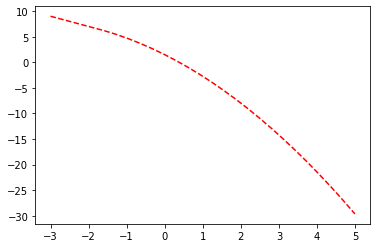

In [9]:
# Initial conditions
x = array([-3, 0, 9, 0., 0., 0.])
dx = np.zeros(6)

x_log = [copy(x)]

# Run
for t in time[1:]:    

    # Forces
    xt = x[0]
    tang = np.array([1., 0, -2])/sqrt(5)            
#     ax = np.dot(tang, -g*e3) * tang[0]
#     ay = 0
#     az = 2*(vx**2 + xt * ax)
#     acc = [ax, ay, az]
    
    if xt < -2:                        
        acc = np.dot(tang, -g*e3) * tang
    else:
        acc =  -g*e3
    #print(acc)    
    #acc = f_T / m
    
    # Dynamics
    dx[:3] = x[3:]
    dx[3:] = acc
    
    
    x = simulate(Δt, x, dx)
    x_log.append(copy(x))
    
x_log = array(x_log)

#plot(time, x_log[:,0])
# Path
plot(x_log[:,0], x_log[:,2], 'r--')
#plot(t1,-2*t1+3)

plt.show()
# plot velocity in z


# Simulating a curved ramp
The ramp has the form $z(x)=x^2$ and the point starts at $(x,z)=(-3,9)$.

The ramp ends at $x=1$, then the robot will continue describing a parabolic trajectory.

### Solution
We can describe the ramp by the parametric function
$$
\boldsymbol\gamma(t)= 
\begin{bmatrix}
t 
\\ 
t^2
\end{bmatrix}
$$
Given a parametric function, its tangent vector can be computed by
$$
\mathbf{t}  = \frac{ \boldsymbol{\dot\gamma}}{\| \boldsymbol{\dot\gamma}\|}
$$
and the normal vector
$$
\kappa \mathbf{n}  =   \mathbf{\dot t} 
$$
In our case, we have
$
\boldsymbol{\dot \gamma} = [1, 2t]^\top
$, then
$$
\mathbf{t} = \frac{1}{\sqrt{4t^2+1}} \begin{bmatrix}
 1
\\ 
2t
\end{bmatrix}
$$

$$
\mathbf{\dot t} = 
\kappa \mathbf{n}
$$

Using Newton's equation
$$m \boldsymbol{\ddot\gamma} = \mathbf{f}_g + \mathbf{f}_n$$
We can solve the acceleration in the x-axis
$$
{\ddot x} = - \frac{2x(2\dot x ^2 + g)}{1+4x^2}
$$

Since z is a function of x, we can use the dynamics in x to compute z,
$$
z=x^2
$$
$$
\dot z=2x \dot x
$$
$$
\ddot z=2(\dot x^2 + x \ddot x)
$$

In [17]:
tf = 4
Δt = 0.01    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

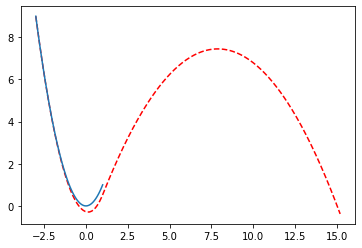

In [18]:
# Initial conditions
x = array([-3, 0, 9, 0., 0., 0.])
dx = np.zeros(6)

x_log = [copy(x)]

# Run
for t in time[1:]:
    #print(t, x[0])
    
    # Dynamics
    dx[:3] = x[3:]
        
    # acceleration
    px = x[0]    
    vx = x[3]    
                    
    if px < 1:                
        ax = -(2*px*(2*(vx**2)+g)) / (1 + 4*(px**2))
        ay = 0
        az = 2*(vx**2 + px * ax)
        acc = [ax, ay, az]
        #print(px, acc, x)
    else:
        acc =  -g*e3
                
        
    dx[:3] = x[3:]
    dx[3:] = acc
        
    
    x = simulate(Δt, x, dx)
    x_log.append(copy(x))
    
x_log = array(x_log)

# Path
plot(x_log[:,0], x_log[:,2], 'r--')

t1 = np.linspace(-3, 1)

plot(t1,t1*t1)



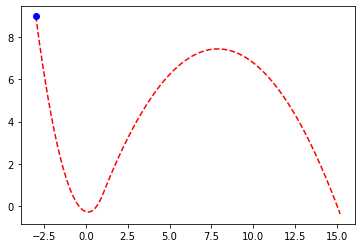

In [26]:
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=20)
HTML(anim.to_jshtml())


